In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Univariant Analysis

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

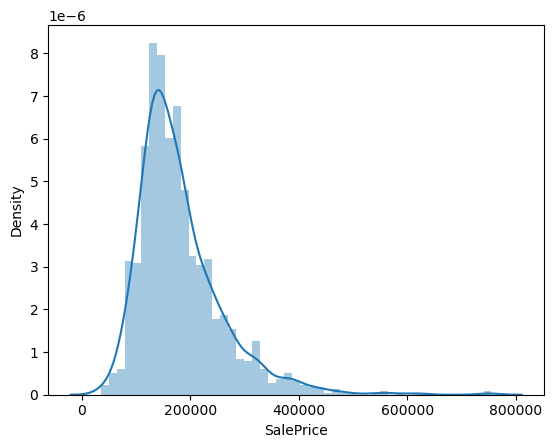

In [5]:
sns.distplot(df_train['SalePrice']);

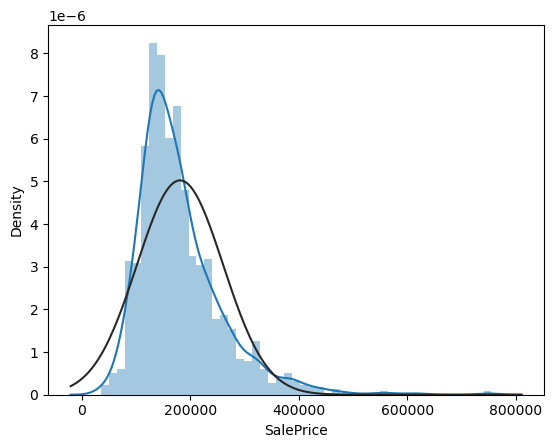

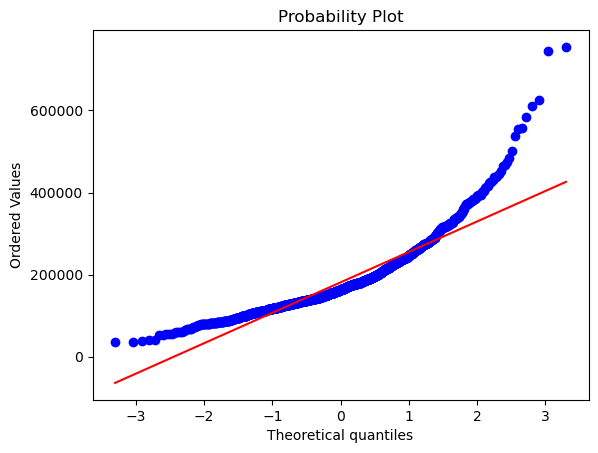

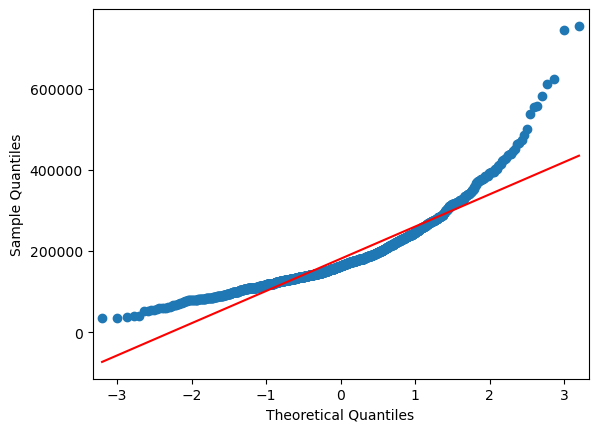

In [6]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
res2= sm.qqplot(df_train['SalePrice'], line='s')
plt.show()

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


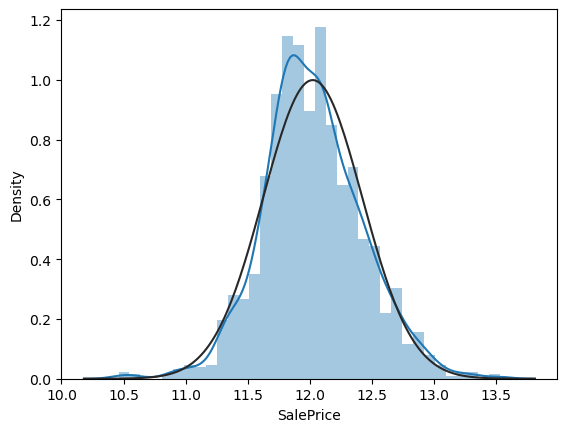

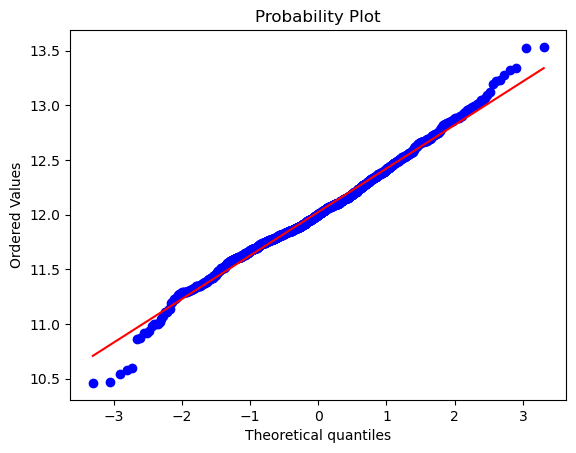

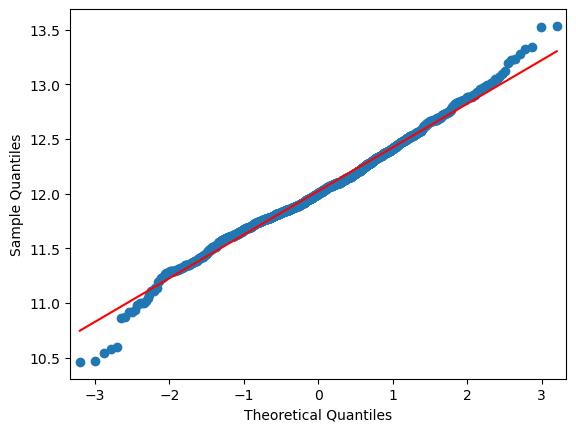

In [8]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
res2= sm.qqplot(df_train['SalePrice'], line='s')
plt.show()

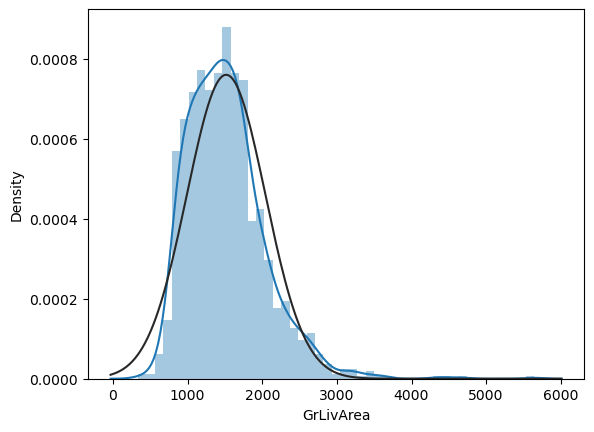

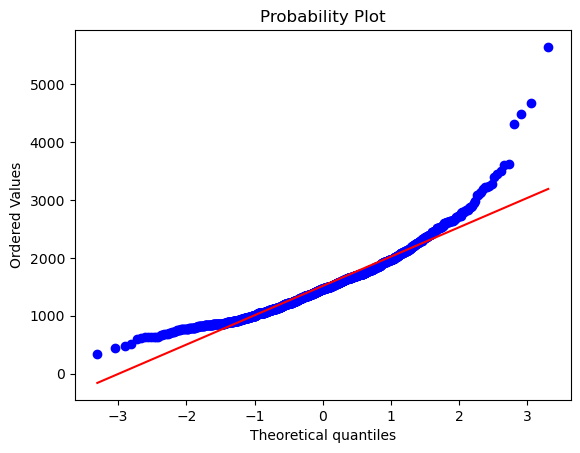

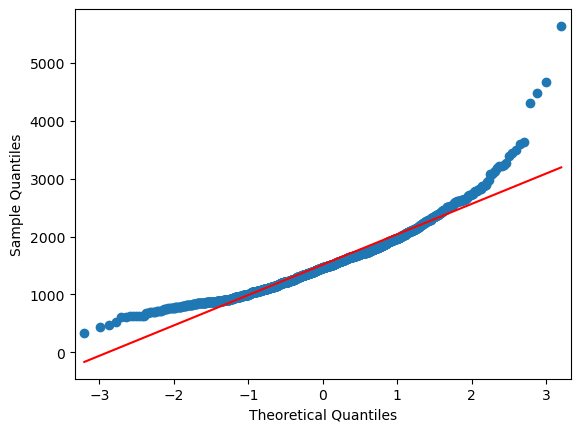

In [9]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)
res2= sm.qqplot(df_train['GrLivArea'], line='s')
plt.show()

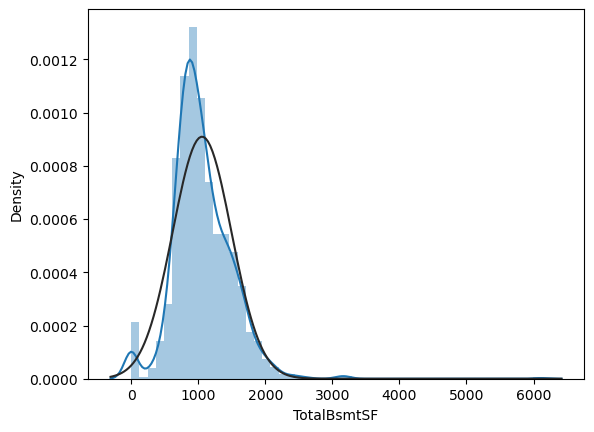

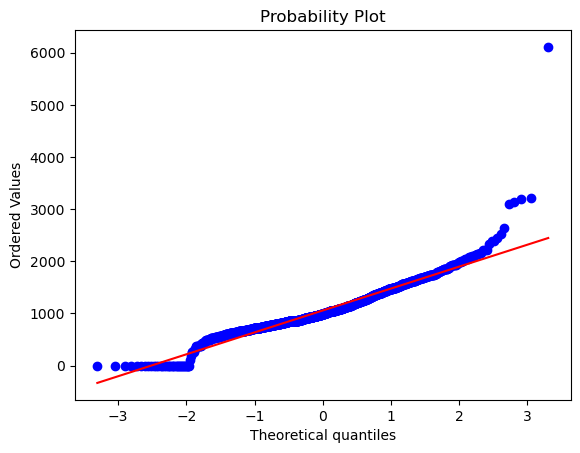

In [10]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

# Bi Variant Analysis

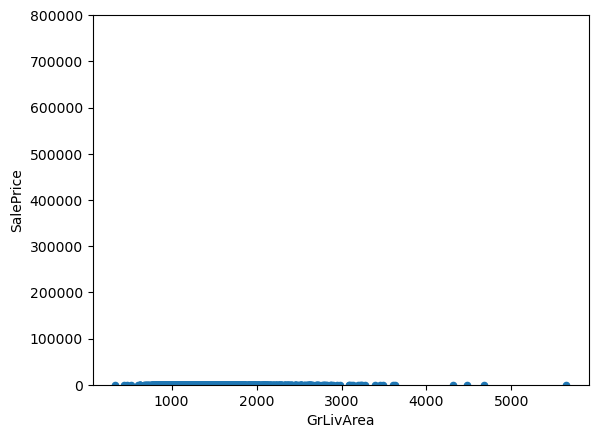

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));


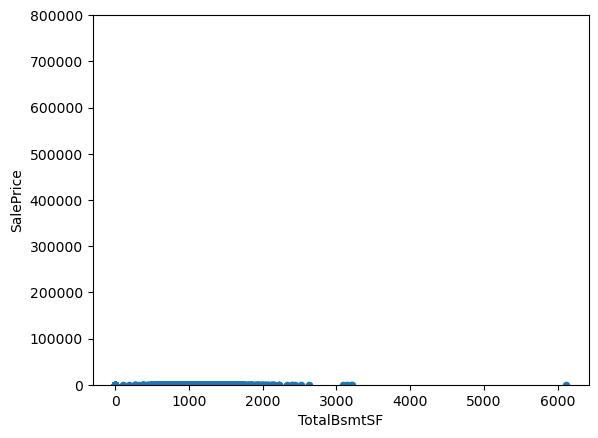

In [12]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));

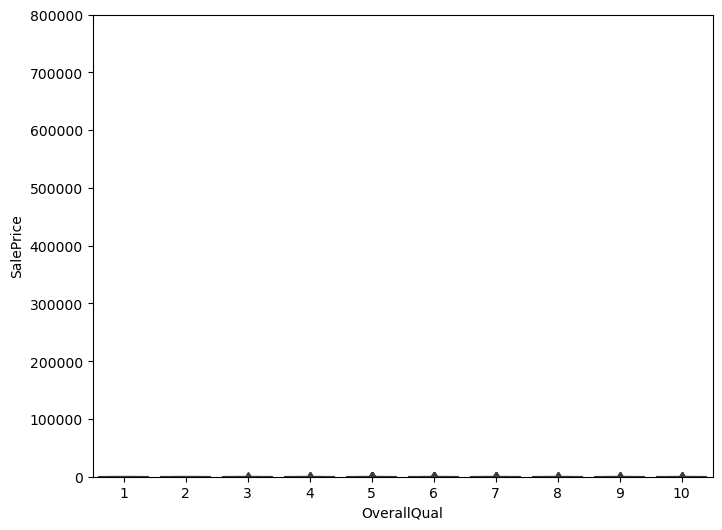

In [13]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [14]:
sns.set(style='whitegrid')

sns.swarmplot(x='GrLivArea',
                  y='SalePrice',
                  data=df_train)

# Multivaruants_ Analysis

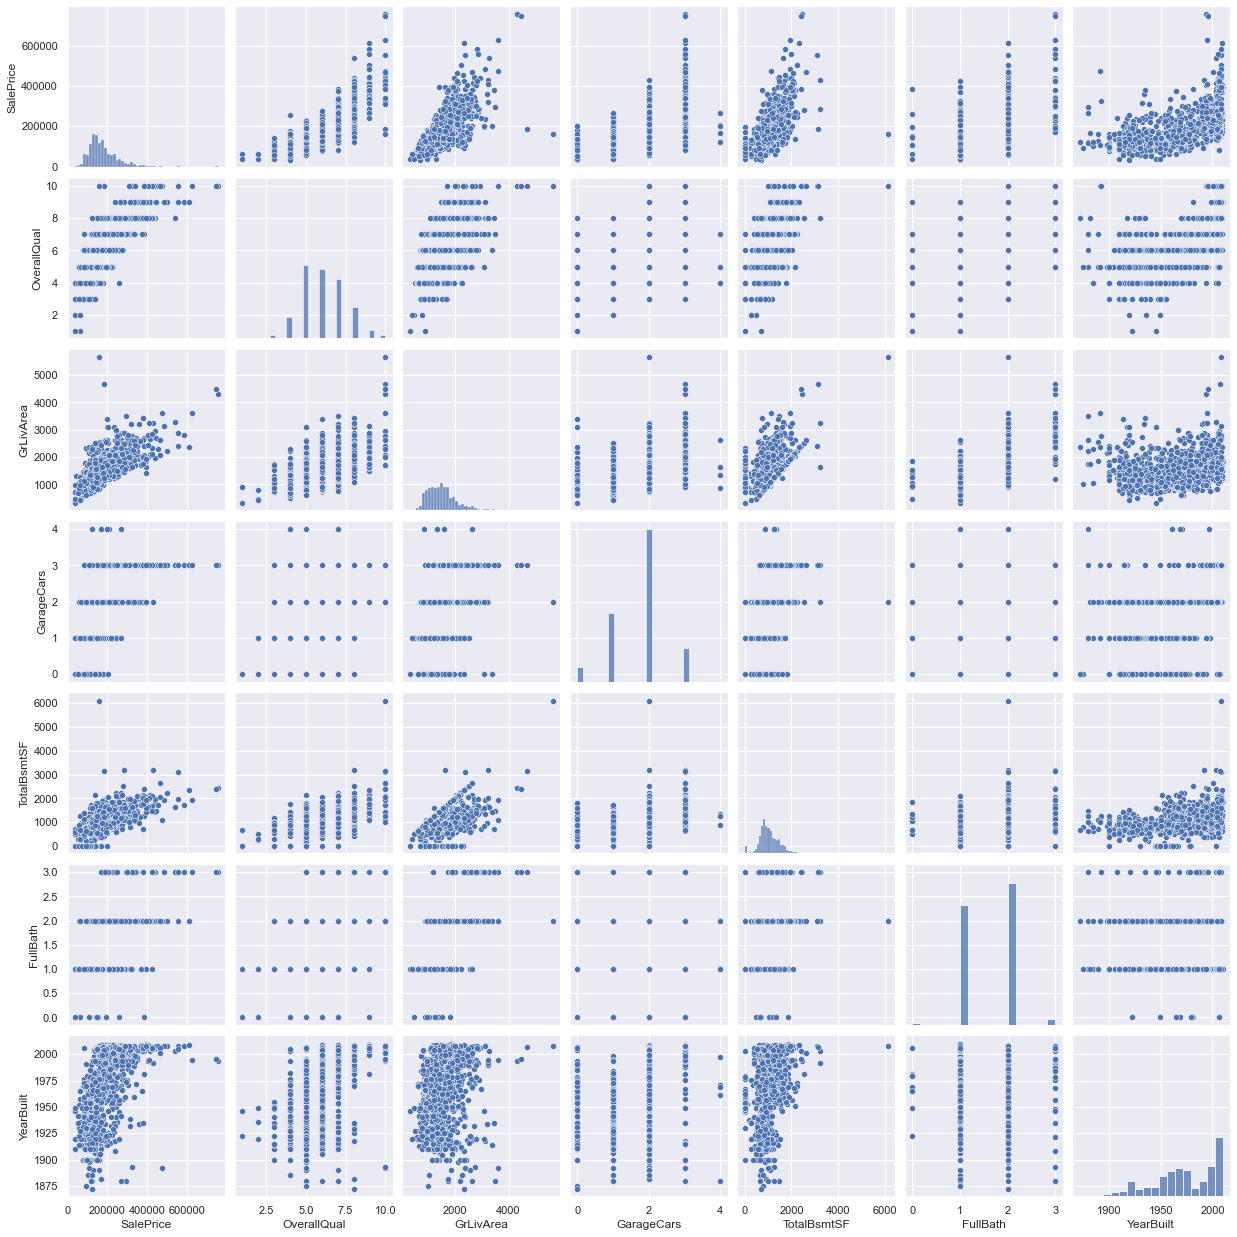

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Missing Values

In [38]:
df_train.shape

(1460, 81)

In [36]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [55]:
df_train.isnull().sum().sum()

6965

In [65]:
df_train.isnull().sum()/len(df_train)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [61]:
nomissing_df_train = df_train.dropna( axis =0)
nomissing_df_train.shape

(0, 81)

In [62]:
nomissing_df_train = df_train.dropna( axis =1)
nomissing_df_train.shape

(1460, 62)

In [68]:
from sklearn.impute import KNNImputer
  
  
# create dataset for marks of a student
dict = {'Maths':[80, 90, np.nan, 95], 
        'Chemistry': [60, 65, 56, np.nan], 
        'Physics':[np.nan, 57, 80, 78],
       'Biology' : [78,83,67,np.nan]}
  
# creating a data frame from the list 
Before_imputation = pd.DataFrame(dict)
#print dataset before imputaion
print("Data Before performing imputation\n",Before_imputation)
  
Data = Before_imputation

Data Before performing imputation
    Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2    NaN       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN


In [69]:
Data ['Maths']=Data['Maths'].fillna((Data['Maths'].median()))
Data

Maths  Chemistry  Physics  Biology
0   80.0       60.0      NaN     78.0
1   90.0       65.0     57.0     83.0
2   90.0       56.0     80.0     67.0
3   95.0        NaN     78.0      NaN

In [70]:
Data2= Before_imputation

In [75]:
imputer = KNNImputer(n_neighbors=2)
imputed = imputer.fit_transform(Data2)
df_imputed = pd.DataFrame(imputed, columns=Data2.columns)

In [76]:
df_imputed

Maths  Chemistry  Physics  Biology
0   80.0       60.0     68.5     78.0
1   90.0       65.0     57.0     83.0
2   90.0       56.0     80.0     67.0
3   95.0       58.0     78.0     72.5

In [81]:
df = pd.read_csv("diabetes .csv")
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [84]:
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [86]:
df['Glucose'].interpolate(method='linear', inplace=True, limit_direction="both")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [87]:
df.isnull().sum()[1:6]

Glucose            0
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [90]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [88]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

In [98]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [97]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_imp  BloodPressure_imp  \
0                       0.627   50        1        148.0               72.0   
1                       0.351   31        0         85.0               66.0   
2                       0.672   32        1        183.0               64.0   
3                       0.167   21        0         89.0               66.0   
4                       2.288   33        1        137.0               40.0   
..                        ...  ...      ...          ...                ...   
763                     0.171   63        0        101.0               76.0   
764                     0.340   27        0        122.0               70.0   
765                     0.245   30        0        121.0               72.0   
766                     0.349   47        1        126.0               60.0   
767                     0.315   23        0         93.0               70.0   

     SkinThickness_imp  Insulin_imp  BMI_imp  
0                 35.0         99.0     33.6  
1                 29.0        495.0     26.6  
2                 43.0        152.0     23.3  
3                 23.0         94.0     28.1  
4                 35.0        168.0     43.1  
..                 ...          ...      ...  
763               48.0        180.0     32.9  
764               27.0         71.0     36.8  
765               23.0        112.0     26.2  
766               30.0         45.0     30.1  
767               31.0        744.0     30.4  

[768 rows x 14 columns]

In [100]:
from sklearn import linear_model
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
        
    deter_data["Det" + feature] = df[feature + "_imp"]
    parameters = list(set(df.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

In [103]:
deter_data

DetGlucose  DetBloodPressure  DetSkinThickness  DetInsulin  DetBMI
0         148.0              72.0         35.000000  199.573000    33.6
1          85.0              66.0         29.000000  109.460522    26.6
2         183.0              64.0         24.457423  213.546862    23.3
3          89.0              66.0         23.000000   94.000000    28.1
4         137.0              40.0         35.000000  168.000000    43.1
..          ...               ...               ...         ...     ...
763       101.0              76.0         48.000000  180.000000    32.9
764       122.0              70.0         27.000000  163.659666    36.8
765       121.0              72.0         23.000000  112.000000    26.2
766       126.0              60.0         28.723952  173.930986    30.1
767        93.0              70.0         31.000000  118.137820    30.4

[768 rows x 5 columns]

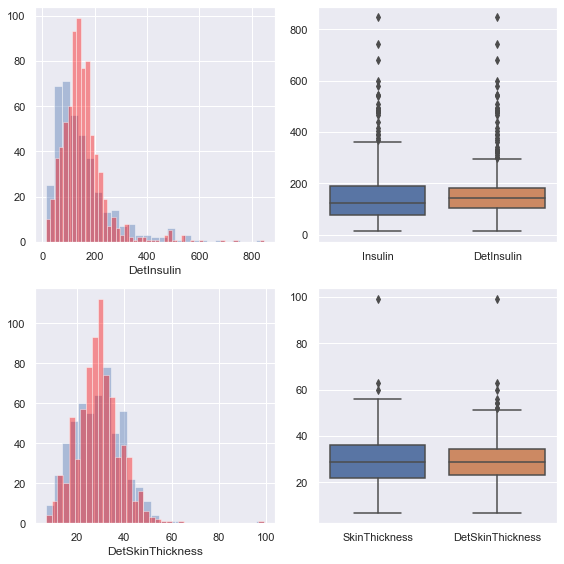

In [101]:
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde = False, ax = axes[index, 0], color = 'red')
    
    sns.boxplot(data = pd.concat([df[variable], deter_data["Det" + variable]], axis = 1),
                ax = axes[index, 1])
    
plt.tight_layout()

# OUTLIERS

In [113]:
fig = px.box(df, y='Glucose')

fig.show()

In [114]:
fig = px.histogram(df, y='Glucose')

fig.show()

In [115]:
q1=df.quantile(0.25)

q3=df.quantile(0.75)

IQR=q3-q1

outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
outliers

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0            NaN      NaN            NaN            NaN      NaN  NaN   
1            NaN      NaN            NaN            NaN      NaN  NaN   
2            NaN      NaN            NaN            NaN      NaN  NaN   
3            NaN      NaN            NaN            NaN      NaN  NaN   
4            NaN      NaN            NaN            NaN      NaN  NaN   
..           ...      ...            ...            ...      ...  ...   
763          NaN      NaN            NaN            NaN      NaN  NaN   
764          NaN      NaN            NaN            NaN      NaN  NaN   
765          NaN      NaN            NaN            NaN      NaN  NaN   
766          NaN      NaN            NaN            NaN      NaN  NaN   
767          NaN      NaN            NaN            NaN      NaN  NaN   

     DiabetesPedigreeFunction  Age  Outcome  Glucose_imp  BloodPressure_imp  \
0                         NaN  NaN      NaN          NaN                NaN   
1                         NaN  NaN      NaN          NaN                NaN   
2                         NaN  NaN      NaN          NaN                NaN   
3                         NaN  NaN      NaN          NaN                NaN   
4                       2.288  NaN      NaN          NaN                NaN   
..                        ...  ...      ...          ...                ...   
763                       NaN  NaN      NaN          NaN                NaN   
764                       NaN  NaN      NaN          NaN                NaN   
765                       NaN  NaN      NaN          NaN                NaN   
766                       NaN  NaN      NaN          NaN                NaN   
767                       NaN  NaN      NaN          NaN                NaN   

     SkinThickness_imp  Insulin_imp  BMI_imp  
0                  NaN          NaN      NaN  
1                  NaN          NaN      NaN  
2                  NaN          NaN      NaN  
3                  NaN          NaN      NaN  
4                  NaN          NaN      NaN  
..                 ...          ...      ...  
763                NaN          NaN      NaN  
764                NaN        370.0      NaN  
765                NaN          NaN      NaN  
766                NaN        375.0      NaN  
767                NaN          NaN      NaN  

[768 rows x 14 columns]

In [118]:
def find_outliers_IQR(df):

    q1=df.quantile(0.25)

    q3=df.quantile(0.75)

    IQR=q3-q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [119]:
outliers = find_outliers_IQR(df['Glucose'])

print('number of outliers: '+ str(len(outliers)))

print('max outlier value: '+ str(outliers.max()))

print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Glucose, dtype: float64)

In [107]:
from sklearn.ensemble import IsolationForest

In [108]:
iso_forest = IsolationForest(n_estimators=300, contamination=0.10)

iso_forest = iso_forest .fit(deter_data)

In [109]:
isof_outliers = iforest.predict(deter_data)

In [111]:
isoF_outliers_values =deter_data[iforest.predict(deter_data) == -1]
isoF_outliers_values

DetGlucose  DetBloodPressure  DetSkinThickness  DetInsulin  DetBMI
8         197.0              70.0         45.000000  543.000000    30.5
13        189.0              60.0         23.000000  846.000000    30.1
18        103.0              30.0         38.000000   83.000000    43.3
22        196.0              90.0         35.738991  242.646775    39.8
43        171.0             110.0         24.000000  240.000000    45.4
..          ...               ...               ...         ...     ...
695       142.0              90.0         24.000000  480.000000    30.4
707       127.0              46.0         21.000000  335.000000    34.4
710       158.0              64.0         13.000000  387.000000    31.2
715       187.0              50.0         33.000000  392.000000    33.9
753       181.0              88.0         44.000000  510.000000    43.3

[79 rows x 5 columns]